In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
import csv
from matplotlib import cm
%matplotlib inline
pylab.rcParams['figure.figsize'] = 9, 6

import matplotlib
from astropy.io import ascii
import mpld3
from mpld3 import plugins, utils
#mpld3.enable_notebook()
#mpld3.disable_notebook()

/Users/taweewat/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
final = pd.read_csv('/Users/taweewat/Documents/xray_project/result/rosat-rad-final.csv',\
                    keep_default_na=False, na_values=[""])

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [6]:
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [7]:
n_samples, n_features = iris.data.shape
print (n_samples, n_features)
print iris.data[0]

(150, 4)
[ 5.1  3.5  1.4  0.2]


In [22]:
#iris.target_names
type(iris)

sklearn.datasets.base.Bunch

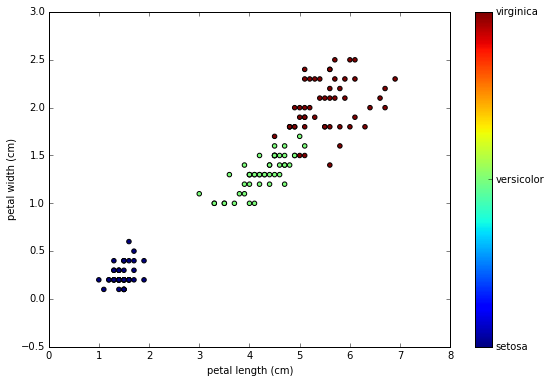

In [21]:
import numpy as np
import matplotlib.pyplot as plt

x_index = 2
y_index = 3

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

Reduced dataset shape: (150, 2)
Meaning of the 2 components:
0.362 x sepal length (cm) + -0.082 x sepal width (cm) + 0.857 x petal length (cm) + 0.359 x petal width (cm)
-0.657 x sepal length (cm) + -0.730 x sepal width (cm) + 0.176 x petal length (cm) + 0.075 x petal width (cm)


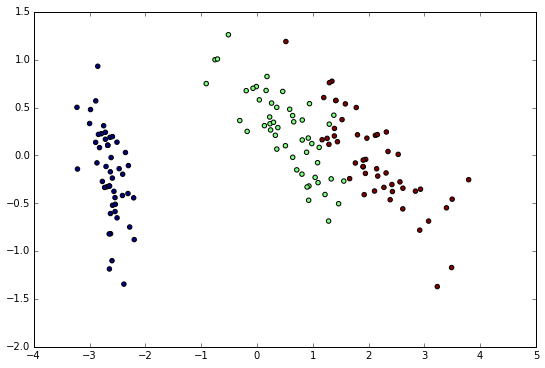

In [4]:
X, y = iris.data, iris.target
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print "Reduced dataset shape:", X_reduced.shape

import pylab as pl
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)

print "Meaning of the 2 components:"
for component in pca.components_:
    print " + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names))

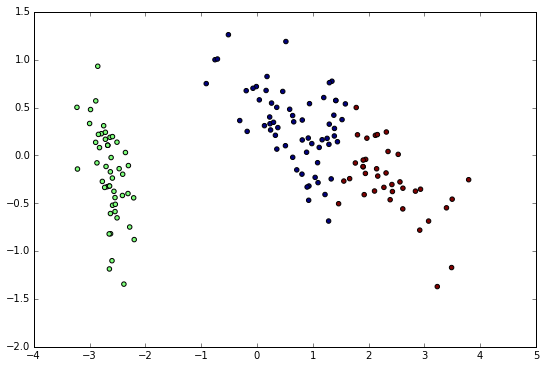

In [5]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred);

In [3]:
def func(x):
    try:
        return np.log10(x)
    except ValueError:
        return np.nan

In [4]:
A=final.loc[:,('wi_f','2m_f','rad_f','x_f')].apply(func)

## KMean for Four Wavelength

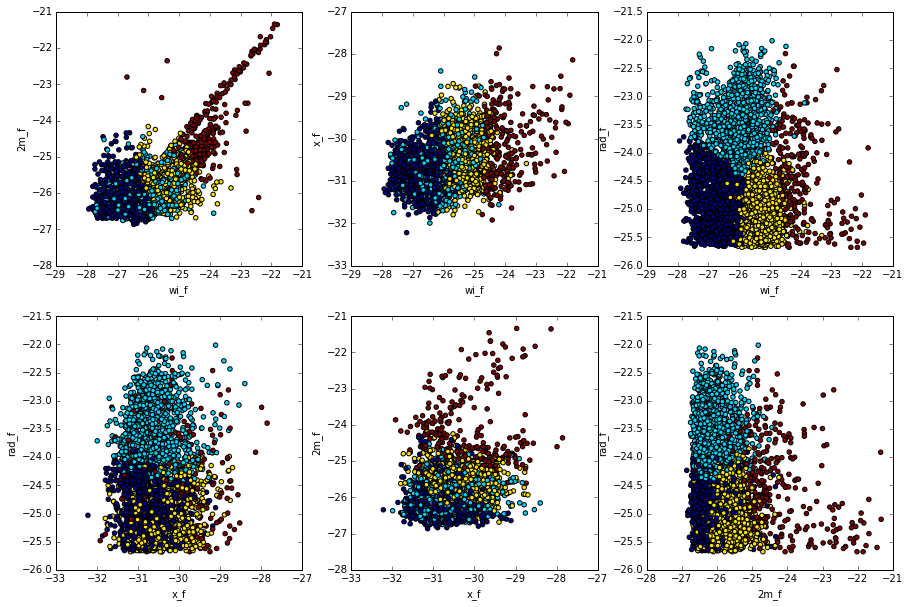

In [5]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=4, random_state=0) # Fixing the RNG in kmeans
k_means.fit(A)
y_pred = k_means.predict(A)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(231)
ax.scatter(A['wi_f'].values, A['2m_f'].values, c=y_pred)
ax2 = fig.add_subplot(232)
ax2.scatter(A['wi_f'].values, A['x_f'].values, c=y_pred)
ax3 = fig.add_subplot(233)
ax3.scatter(A['wi_f'].values, A['rad_f'].values, c=y_pred)
ax4 = fig.add_subplot(234)
ax4.scatter(A['x_f'].values, A['rad_f'].values, c=y_pred)
ax5 = fig.add_subplot(235)
ax5.scatter(A['x_f'].values, A['2m_f'].values, c=y_pred)
ax6 = fig.add_subplot(236)
ax6.scatter(A['2m_f'].values, A['rad_f'].values, c=y_pred)

ax.set_xlabel('wi_f')
ax.set_ylabel('2m_f')
ax2.set_xlabel('wi_f')
ax2.set_ylabel('x_f')
ax3.set_xlabel('wi_f')
ax3.set_ylabel('rad_f')
ax4.set_xlabel('x_f')
ax4.set_ylabel('rad_f')
ax5.set_xlabel('x_f')
ax5.set_ylabel('2m_f')
ax6.set_xlabel('2m_f')
ax6.set_ylabel('rad_f')


#pl.scatter(A['wi_f'].values, A['x_f'].values, c=y_pred)
#pl.scatter(A['wi_f'].values, A['rad_f'].values, c=y_pred)

In [20]:
A['c']=y_pred
#print A.loc[A['c']==0,:].shape, A.loc[A['c']==1,:].shape, A.loc[A['c']==2,:].shape, A.loc[A['c']==3,:].shape
#plt.plot(A.loc[A['c']==3,:]['wi_f'], A.loc[A['c']==3,:]['2m_f'], '.')
A.loc[A['c']==3,:]

,wi_f,2m_f,rad_f,x_f,c
6,-23.943574,-23.949112,-23.909389,-31.033512,3
49,-23.907974,-25.319912,-23.682564,-31.220613,3
50,-23.677574,-25.265912,-23.719649,-31.017330,3
80,-23.795974,-24.200712,-23.112664,-31.638955,3
81,-24.423574,-23.857512,-25.481486,-31.923081,3
89,-24.746374,-24.165512,-25.366532,-31.794818,3
107,-24.591574,-24.163912,-24.399027,-30.884906,3
150,-24.429574,-24.690312,-24.051098,-31.574709,3
176,-24.147574,-24.289512,-25.481486,-31.354374,3
208,-24.535974,-24.211112,-25.244125,-31.192549,3


## Dimensionality Reduction: PCA (Principle Component Analysis)
- http://www.astro.washington.edu/users/vanderplas/Astr599/notebooks/17_SklearnIntro.html

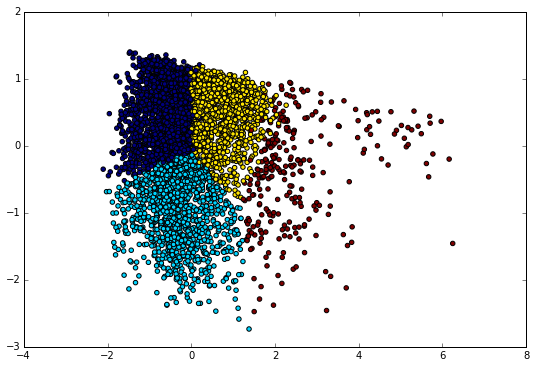

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(A)
X_reduced = pca.transform(A)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred)